**PRACTICA 4**

In [1]:
#Alumno: Sergio González Martínez

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

Pregunta 1) Si la red es conocida, escogeremos a la persona que mas grado tenga, por tanto será la persona que mas relaciones sexuales tiene, de manera que al estar inmunizado todos sus vecinos gozarian de la seguridad de la vacuna al relacionarse con esta persona

Pregunta 1)

In [2]:
def redVacunacionAleatoria(N):
    g=nx.Graph()
    
    g.add_nodes_from(range(1,N))
    for x in list(g.nodes()):
        for y in list(g.nodes()):
            if(random.randint(0, 10)>5 and x!=y):
                g.add_edge(x,y)
    
    nx.draw(g,with_labels=True)
    return g

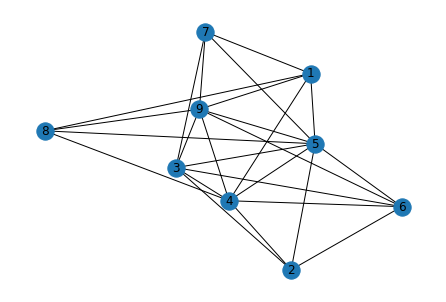

In [3]:
red=redVacunacionAleatoria(10)
plt.show()
#Estas va a ser nuestra red.

In [4]:
#PARA MI LA ESTRATEGIA MAS EFECTIVA, vacunar al nodo con mayo numero de vecinos.
def getNodoMaxVecinos(red):
    maxi=0
    contVecinos=0
    for x in list(red.nodes()):
        listavecinos=list(red.neighbors(x))
        if(len(listavecinos)>maxi):
            maxi=len(listavecinos)
            nodo=x
            contVecinos=len(list(red.neighbors(x)))
            
    return nodo,contVecinos
    

In [5]:
#Obtenemos el nodo con mas vecinos
nodo,vecinos=getNodoMaxVecinos(red)
print("El nodo vacunado seria",nodo,"y salvariamos a:",vecinos,"y contando al vacunado, salvariamos a un total de:",vecinos+1,"personas")


El nodo vacunado seria 5 y salvariamos a: 8 y contando al vacunado, salvariamos a un total de: 9 personas


Por tanto el nodo que deberiamos vacunar es nodo mostrado arriba, de manera que asi aseguramos que todos los nodos o personas relacionadas con el estan a salvo.

Pregunta 2:

In [6]:
#Vacunar T veces a un individuo aleatorio
def getNodoRandom(red):
    maxi=0
    contVecinos=0
    for x in list(red.nodes()):
        listavecinos=list(red.neighbors(x))
        rd=random.randint(1, 10)
        if(rd>maxi):
            maxi=rd
            nodo=x
            contVecinos=len(list(red.neighbors(x)))
    return nodo,contVecinos
    

In [7]:
#Obtenemos el nodo aleatorio
def VacunarAleatoriamente(T, tipo=None): #T sera el numero de veces que queremos probar al vacunar personas aleatorias.
    contVecinosTotal=0
    for x in range(T):
        nodo,vecinos=getNodoRandom(red)
        contVecinosTotal += vecinos
        if(tipo==None):
            print("El nodo vacunado seria",nodo,"y salvariamos a:",vecinos,"y contando al vacunado, salvariamos a un total de:",vecinos+1,"personas")
    
    relacionesInmunizadasEsperadas=( 1/T ) * contVecinosTotal
    print("Relaciones Inmunizadas Esperadas:",relacionesInmunizadasEsperadas)
    return relacionesInmunizadasEsperadas

relacionesInmunizadasEsperadas=VacunarAleatoriamente(10)



El nodo vacunado seria 8 y salvariamos a: 4 y contando al vacunado, salvariamos a un total de: 5 personas
El nodo vacunado seria 8 y salvariamos a: 4 y contando al vacunado, salvariamos a un total de: 5 personas
El nodo vacunado seria 8 y salvariamos a: 4 y contando al vacunado, salvariamos a un total de: 5 personas
El nodo vacunado seria 3 y salvariamos a: 6 y contando al vacunado, salvariamos a un total de: 7 personas
El nodo vacunado seria 6 y salvariamos a: 5 y contando al vacunado, salvariamos a un total de: 6 personas
El nodo vacunado seria 3 y salvariamos a: 6 y contando al vacunado, salvariamos a un total de: 7 personas
El nodo vacunado seria 1 y salvariamos a: 5 y contando al vacunado, salvariamos a un total de: 6 personas
El nodo vacunado seria 1 y salvariamos a: 5 y contando al vacunado, salvariamos a un total de: 6 personas
El nodo vacunado seria 8 y salvariamos a: 4 y contando al vacunado, salvariamos a un total de: 5 personas
El nodo vacunado seria 7 y salvariamos a: 4 y 

Pregunta 3):


In [8]:
#Elegiremos a un nodo al azar y vacunaremos a uno de sus vecinos:

In [9]:
def vacunacionAleatoriaIndirecta():
    nodoExaminado=getNodoRandom(red)
    contVecinos=0
    maxi=0
    for vecino in list(red.neighbors(nodoExaminado[0])):
        rd=random.randint(1, 10)
        if(rd>maxi):
            maxi=rd
            nodo=vecino
            contVecinos=len(list(red.neighbors(vecino)))
    
    return nodoExaminado[0],nodo,contVecinos
def probarVacunacionAleatoriaIndirecta(T,tipo=None):
    contVecinosTotal=0
    for x in range(T):
        nodoExaminado,nodo,contVecinos = vacunacionAleatoriaIndirecta()
        nodo,vecinos=getNodoRandom(red)
        contVecinosTotal += contVecinos
        if(tipo==None):
            print("El nodo examinado para la seleccion de su vecino seria:",nodoExaminado,
                  "\nEl nodo vacunado seria",nodo,"y salvariamos a:",contVecinos,
                  "\nContando al vacunado, salvariamos a un total de:",contVecinos+1,"personas\n\n")
        
        
    relacionesInmunizadasEsperadas=( 1/T ) * contVecinosTotal
    print("Relaciones Inmunizadas Esperadas:",relacionesInmunizadasEsperadas)
    return relacionesInmunizadasEsperadas

In [10]:
relacionesInmunizadasEsperadas=probarVacunacionAleatoriaIndirecta(10)


El nodo examinado para la seleccion de su vecino seria: 5 
El nodo vacunado seria 3 y salvariamos a: 7 
Contando al vacunado, salvariamos a un total de: 8 personas


El nodo examinado para la seleccion de su vecino seria: 3 
El nodo vacunado seria 9 y salvariamos a: 8 
Contando al vacunado, salvariamos a un total de: 9 personas


El nodo examinado para la seleccion de su vecino seria: 2 
El nodo vacunado seria 8 y salvariamos a: 5 
Contando al vacunado, salvariamos a un total de: 6 personas


El nodo examinado para la seleccion de su vecino seria: 6 
El nodo vacunado seria 5 y salvariamos a: 6 
Contando al vacunado, salvariamos a un total de: 7 personas


El nodo examinado para la seleccion de su vecino seria: 3 
El nodo vacunado seria 2 y salvariamos a: 8 
Contando al vacunado, salvariamos a un total de: 9 personas


El nodo examinado para la seleccion de su vecino seria: 5 
El nodo vacunado seria 1 y salvariamos a: 6 
Contando al vacunado, salvariamos a un total de: 7 personas


El n

Para mi las dos estrategias son igual de malas, ya que la optima seria vacunar a la persona con mayor numero de vecinos.
Pero como hay que escoger una me quedaria con la segunda, la de vacunar a un vecino de un nodo seleccionado, ya que de esta manera nos aseguramos de que almenos la persona que vamos a vacunar tiene almenos 1 contacto, ya que con la primera estrategia podia vacunar a una persona sin contactos.


Pregunta 5) Implemente una función en python que dada una red (por ejemplo la red de contactos propuesta inicialmente) calcule el valor esperado del número de relaciones inmunizadas esperadas para la vacunación aleatoria. Piense en la relación que existe entre la distribución del grado de los nodos y su valor medio con el número de relaciones inmunizadas esperado de la estrategia de vacunación aleatoria. Compare este valor con el obtenido mediante simulación.




In [11]:
#Usamos la funcion creada anteriormente VacunarAleatoriamente() para probarlo

def valorEsperadoAleatoria():
    valorEsperado=0
    for cont in range(red.size()):
        valorEsperado+=cont*VacunarAleatoriamente(red.size(),1)
    
    return valorEsperado


In [12]:
print("\nEl valor esperado es:",valorEsperadoAleatoria())

Relaciones Inmunizadas Esperadas: 5.32
Relaciones Inmunizadas Esperadas: 5.12
Relaciones Inmunizadas Esperadas: 5.8
Relaciones Inmunizadas Esperadas: 5.5600000000000005
Relaciones Inmunizadas Esperadas: 5.72
Relaciones Inmunizadas Esperadas: 5.64
Relaciones Inmunizadas Esperadas: 5.8
Relaciones Inmunizadas Esperadas: 5.32
Relaciones Inmunizadas Esperadas: 6.24
Relaciones Inmunizadas Esperadas: 5.72
Relaciones Inmunizadas Esperadas: 5.64
Relaciones Inmunizadas Esperadas: 5.12
Relaciones Inmunizadas Esperadas: 5.32
Relaciones Inmunizadas Esperadas: 5.28
Relaciones Inmunizadas Esperadas: 5.5600000000000005
Relaciones Inmunizadas Esperadas: 5.64
Relaciones Inmunizadas Esperadas: 5.36
Relaciones Inmunizadas Esperadas: 5.24
Relaciones Inmunizadas Esperadas: 5.4
Relaciones Inmunizadas Esperadas: 6.16
Relaciones Inmunizadas Esperadas: 5.64
Relaciones Inmunizadas Esperadas: 5.36
Relaciones Inmunizadas Esperadas: 5.76
Relaciones Inmunizadas Esperadas: 5.32
Relaciones Inmunizadas Esperadas: 5.600

Pregunta 6) Implemente una función en python que dada una red (por ejemplo la red de contactos propuesta inicialmente) calcule el valor esperado del número de relaciones inmunizadas para la vacunación aleatoria indirecta. Compare este valor con el obtenido mediante simulación.

In [13]:
#Usamos la funcion creada anteriormente VacunarAleatoriamente() para probarlo

def valorEsperadoAleatoriaIndirecta():
    valorEsperado=0
    for cont in range(red.size()):
        valorEsperado+=cont*probarVacunacionAleatoriaIndirecta(red.size(),1)
    
    return valorEsperado


In [14]:
print("\nEl valor esperado es:",valorEsperadoAleatoriaIndirecta())

Relaciones Inmunizadas Esperadas: 6.08
Relaciones Inmunizadas Esperadas: 5.68
Relaciones Inmunizadas Esperadas: 5.76
Relaciones Inmunizadas Esperadas: 6.08
Relaciones Inmunizadas Esperadas: 6.2
Relaciones Inmunizadas Esperadas: 5.68
Relaciones Inmunizadas Esperadas: 5.5600000000000005
Relaciones Inmunizadas Esperadas: 6.28
Relaciones Inmunizadas Esperadas: 5.92
Relaciones Inmunizadas Esperadas: 5.6000000000000005
Relaciones Inmunizadas Esperadas: 6.44
Relaciones Inmunizadas Esperadas: 6.32
Relaciones Inmunizadas Esperadas: 6.16
Relaciones Inmunizadas Esperadas: 5.84
Relaciones Inmunizadas Esperadas: 5.92
Relaciones Inmunizadas Esperadas: 5.68
Relaciones Inmunizadas Esperadas: 5.84
Relaciones Inmunizadas Esperadas: 6.08
Relaciones Inmunizadas Esperadas: 6.08
Relaciones Inmunizadas Esperadas: 5.96
Relaciones Inmunizadas Esperadas: 5.96
Relaciones Inmunizadas Esperadas: 5.76
Relaciones Inmunizadas Esperadas: 5.8
Relaciones Inmunizadas Esperadas: 5.88
Relaciones Inmunizadas Esperadas: 5.08